In [4]:
from skimage.morphology import binary_erosion, binary_dilation, binary_closing, skeletonize, thin
from skimage.measure import find_contours
from commonfunctions import *
import lutils
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.feature import canny
from skimage.filters import gaussian
from matplotlib.pyplot import bar
from skimage.exposure import histogram
from skimage.color import rgb2gray
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import os
import cv2 as cv
%matplotlib inline


In [2]:
def myHistogram(gray_image):
    hist = np.zeros(257)
    for i in gray_image:
        for j in i:
            hist[j] += 1
    return hist


In [3]:
def threshold(gray_image):
    margin = 30
    # imgHist = histogram(gray_image, nbins=256)[0].astype(np.uint8)
    imgHist = myHistogram(gray_image=gray_image)
    maxIndex = np.argmax(imgHist)

    indexleft = 0
    if maxIndex > margin:
        indexleft = np.argmax(imgHist[:maxIndex-margin])

    indexRight = 256
    if 256 - maxIndex > margin:
        indexRight = maxIndex + margin + \
            np.argmax(imgHist[maxIndex+margin:255])

    if imgHist[indexleft] > imgHist[indexRight]:
        return indexleft + np.argmin(imgHist[indexleft:maxIndex])
    else:
        return maxIndex + np.argmin(imgHist[maxIndex:indexRight])


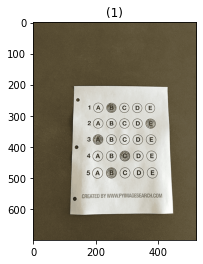

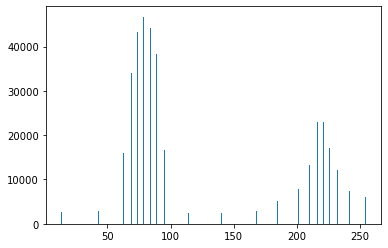

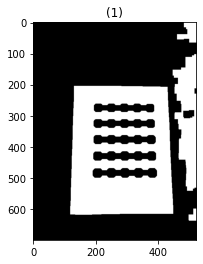

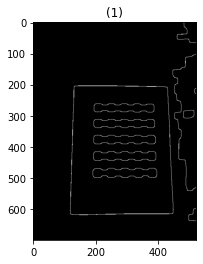

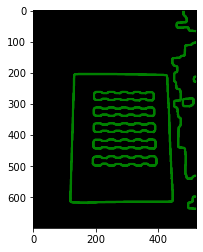

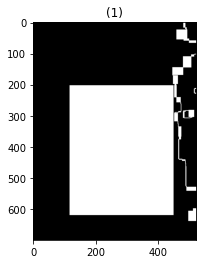

In [4]:
image = io.imread("imgs/7.png")

show_images([image])
orignal_image = image.copy()
#orignal_image = resize(orignal_image, (500 , 500))
#orignal_image = orignal_image.astype(float)

gray_image = np.round(rgb2gray(image)*256).astype(int)

showHist(gray_image)

th = threshold(gray_image)


gray_image = gray_image > th
dia_SE = np.ones((16, 16))
#Bluured_image  = gaussian(gray_image, sigma=1,  mode='nearest')
opening = binary_dilation(binary_erosion(gray_image, dia_SE), dia_SE)
closing = binary_erosion(binary_dilation(opening, dia_SE), dia_SE)
show_images([closing])
edged = canny(closing, sigma=3)
# show the original image and the edge detected image
show_images([edged])


bounding_boxes = find_contours(edged, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(edged, cmap=plt.cm.gray)
blank = np.zeros(gray_image.shape)

for contour in bounding_boxes:
    x_diff = contour[:, 1].max() - contour[:, 1].min()
    y_diff = contour[:, 0].max() - contour[:, 0].min()
# #     print(x_diff,y_diff)
#     if( x_diff >= image.shape[1] // 5  or y_diff >= image.shape[0]//5 ):
# #       print('hi')
    for i in contour[:, 0]:
        for j in contour[:, 1]:
            # print(i,j)
            blank[int(i)][int(j)] = 1
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2, color='green')
show_images([blank])


In [ ]:
## open cv 
image = cv.imread("imgs/7.png")
orignalImage = image.copy()

## convert image into grey scale
grayImage = cv.cvtColor(orignalImage, cv.COLOR_BGR2GRAY)

## structure element
SE =np.ones((5,5),np.uint8)
# opening
openingImage = cv.morphologyEx(grayImage, cv.MORPH_OPEN, SE)
# followed by closing with same SE
closingImage = cv.morphologyEx(openingImage, cv.MORPH_CLOSE, SE)

#cv.calcHist(images, channels, mask, histSize, ranges)


# show the original image and the edge detected image
print("STEP 1: Edge Detection")
cv.imshow("Image", grayImage)
# cv.imshow("Image", openingImage)
cv.waitKey(0)




In [ ]:
from skimage.morphology import opening, closing, diameter_closing, disk, erosion, dilation
from commonfunctions import *


def get_choices(img):
    hit, wid = img.shape[0], img.shape[1]
    # Scale the image in 0-255 scale then negate it.
    img = 255 - lutils.conv2_255(img)
    img = median(img)

    # Choice in white, Background in black.
    th = lutils.ptile(img, 85)

    img = np.where(img > th, 255, 0)

    # img = dilation(img, disk(5))

    # img = erosion(img, disk(10))
    # for i in range(1, 10):
    #     show_images([img])
    #     img = dilation(img, disk(i + 4))
    #     img = erosion(img, disk(i + 5))

    # binary_dilation
    # binary_erosion
    #dilation(erosion(img, structure_element), structure_element)
    #img = closing(img, np.ones((1, wid)))
    return img

    return {'Q1': 'C', 'Q6': 'A', 'Q3': 'F'}


img = io.imread('imgs/8.png')
choices = get_choices(img)
show_images([img, choices])


In [ ]:


    img = cv2.imread(img_file)
    img = cv2.resize(img, (width, height))
    orig_img = img.copy()

    # preprocess the image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(img, 75, 200)

    # find and sort the contours
    contours, _ = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    # go through each contour
    for contour in contours:
        # approximate each contour
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.05 * peri, True)
        # check if we have found our document
        if len(approx) == 4:
            doc_cnts = approx
            break
   
    # apply warp perspective to get the top-down view
    warped = four_point_transform(orig_img, doc_cnts.reshape(4, 2))
    warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
    final_img = cv2.resize(warped, (600, 800))
    
    # write the image in the ouput directory
    cv2.imwrite("output" + "/" + os.path.basename(img_file), final_img)


In [5]:
img = cv.imread('imgs/8.png')
cv.imshow('imgs/8.png',img)
cv.waitKey(0) # waits until a key is pressed
cv.destroyAllWindows() # destroys the window showing image

KeyboardInterrupt: 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
